<div style="border-left: 6px solid #84afdbff; padding-left: 20px; margin-top: 20px; font-family: sans-serif;">
    <h1 style="color: #16e5aeff; margin-bottom: 5px;">Projet Data Mining : Prévision Boursière</h1>
    <p style="font-size: 1.2em; color: #7f8c8d; margin-top: 0;"><b>Étape 1 :</b> Collecte et Préparation des Données</p>
    <hr style="border: 0; border-top: 1px solid #eee;">
    <p style="font-size: 0.9em;">
        <b>Réalisé par :</b> Chaimaa EL AFFAS & Youssef AIT BAHSSIN <br>
        <b>Encadré par :</b> Pr. KHADIJA BOUZAACHANE
    </p>
</div>

### Step 1: Load and Inspect the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to your file
file_path = '../data/raw/stock_prices.csv'

# Read the CSV
# header=[0, 1, 2] tells pandas that the first 3 rows are headers (Price, Ticker, etc.)
# This is crucial for the file you downloaded from Kaggle/yfinance
df = pd.read_csv(file_path, index_col=0, parse_dates=True, header=[0, 1, 2])

# Show the raw structure
print("Raw Data Structure:")
print(df.head())

# Check if we have numbers (float) or text (object)
print("\nData Types:")
print(df.dtypes.head())

Raw Data Structure:
Ticker                   ^VIX                                        \
Price                    Open               High                Low   
Date       Unnamed: 1_level_2 Unnamed: 2_level_2 Unnamed: 3_level_2   
2020-01-02              13.46          13.720000              12.42   
2020-01-03              15.01          16.200001              13.13   
2020-01-06              15.45          16.389999              13.54   
2020-01-07              13.84          14.460000              13.39   
2020-01-08              15.16          15.240000              12.83   

Ticker                                                        ^GSPC  \
Price                   Close             Volume               Open   
Date       Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
2020-01-02              12.47                  0        3244.669922   
2020-01-03              14.02                  0        3226.360107   
2020-01-06              13.85                  0        

### Step 2: Clean the Header and Extract Close Prices

In [4]:
# 1. Simplify the MultiIndex
# The columns are (Ticker, Price, Date_Level_2). We only care about Ticker and Price.
# Let's drop the 3rd level (Date/Unnamed) which is useless.
df.columns = df.columns.droplevel(2)

print("Columns after dropping level 2:")
print(df.columns)

# 2. Extract Close Prices
# We want a DataFrame where columns are Tickers and values are Close prices.
close_prices = pd.DataFrame()
tickers = ['AAPL', 'MSFT', 'TSLA', '^GSPC', '^VIX', '^TNX']

for ticker in tickers:
    try:
        # Access the column (Ticker, Close)
        # Note: Depending on how pandas read it, it might be (Ticker, Close) or (Close, Ticker)
        # Based on your output: Ticker is Level 0, Price is Level 1.
        close_prices[ticker] = df[ticker]['Close']
    except KeyError:
        print(f"Warning: Could not find Close for {ticker}")

print("\nCleaned Close Prices:")
print(close_prices.head())

Columns after dropping level 2:
MultiIndex([( '^VIX',   'Open'),
            ( '^VIX',   'High'),
            ( '^VIX',    'Low'),
            ( '^VIX',  'Close'),
            ( '^VIX', 'Volume'),
            ('^GSPC',   'Open'),
            ('^GSPC',   'High'),
            ('^GSPC',    'Low'),
            ('^GSPC',  'Close'),
            ('^GSPC', 'Volume'),
            ( 'TSLA',   'Open'),
            ( 'TSLA',   'High'),
            ( 'TSLA',    'Low'),
            ( 'TSLA',  'Close'),
            ( 'TSLA', 'Volume'),
            ( 'MSFT',   'Open'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',  'Close'),
            ( 'MSFT', 'Volume'),
            ( '^TNX',   'Open'),
            ( '^TNX',   'High'),
            ( '^TNX',    'Low'),
            ( '^TNX',  'Close'),
            ( '^TNX', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
           

<div style="border-left: 4px solid #3498db; padding-left: 15px; margin: 20px 0; font-family: sans-serif;">
    <h3 style="color: #2980b9;">Nettoyage et Structuration des Données</h3>
    <p>Cette étape est cruciale pour transformer les données brutes en un format exploitable pour le Data Mining :</p>
    <ul>
        <li><b>Simplification de la structure :</b> Les données importées via <i>yfinance</i> possèdent souvent des colonnes complexes à plusieurs niveaux (MultiIndex). Nous avons supprimé le niveau inutile pour ne garder que le nom de l'actif et le type de prix.</li>
        <li><b>Extraction des Prix de Clôture :</b> Pour la prédiction boursière, le prix de clôture (<i>Close</i>) est la donnée la plus significative. Nous avons isolé ces prix pour chaque ticker afin de créer un tableau propre et unifié.</li>
    </ul>
    <p><i>Résultat :</i> Nous passons d'un fichier brut complexe à une série temporelle simplifiée où chaque colonne représente un actif (ex: AAPL, TSLA) prêt pour l'analyse statistique.</p>
</div>

<div style="border-left: 4px solid #e67e22; padding-left: 15px; margin: 25px 0; font-family: sans-serif; line-height: 1.6;">
    <h2 style="color: #d35400;"> Concept et Méthodologie du Projet</h2>
    
<h4 style="color: #2c3e50; margin-bottom: 5px;">1. Qu'est-ce que le "Close" ?</h4>
<p>Le prix de <b>clôture (Close)</b> est le dernier prix auquel une action s'est échangée lors d'une séance boursière. C'est la référence standard en finance car elle reflète le consensus final du marché pour la journée.</p>

<h4 style="color: #2c3e50; margin-bottom: 5px;">2. Inputs (Entrées) vs Target (Cible)</h4>
    <ul style="list-style-type: none; padding-left: 0;">
        <li> <b>Inputs :</b> Nous utilisons les prix historiques, les indicateurs techniques (RSI, MACD) et des données macroéconomiques (VIX, Taux 10 ans) pour donner du contexte au modèle.</li>
        <li> <b>Target :</b> Notre but est de prédire la <b>direction</b> du prix au jour J+1 (Hausse ou Baisse). C'est un problème de <b>classification binaire</b>.</li>
    </ul>

<h4 style="color: #2c3e50; margin-bottom: 5px;">3. Workflow du Projet (Flux de travail)</h4>
    <div style="display: flex; justify-content: space-around; background: #f9f9f9; padding: 15px; border-radius: 5px; font-size: 0.85em; text-align: center;">
        <div style="width: 20%;"><b>1. Préparation</b><br>Collecte & Nettoyage</div>
        <div style="width: 5%;">➔</div>
        <div style="width: 20%;"><b>2. Engineering</b><br>Indicateurs & Lags</div>
        <div style="width: 5%;">➔</div>
        <div style="width: 20%;"><b>3. Modélisation</b><br>ML vs Deep Learning</div>
        <div style="width: 5%;">➔</div>
        <div style="width: 20%;"><b>4. Évaluation</b><br>Backtesting & ROI</div>
    </div>
</div>

<div style="border-left: 4px solid #27ae60; padding-left: 15px; margin-top: 30px;">
    <h2 style="color: #27ae60;"> Analyse Statistique Descriptive</h2>
    <p>Nous allons examiner les propriétés statistiques des prix pour identifier la volatilité et les relations entre les actifs.</p>
</div>

In [5]:
# Vérification des valeurs manquantes et des types
print("Résumé de l'intégrité des données :")
print(close_prices.info())
print("\nNombre de jours de bourse total :", len(close_prices))

Résumé de l'intégrité des données :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1499 entries, 2020-01-02 to 2025-12-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1498 non-null   float64
 1   MSFT    1498 non-null   float64
 2   TSLA    1497 non-null   float64
 3   ^GSPC   1498 non-null   float64
 4   ^VIX    1499 non-null   float64
 5   ^TNX    1498 non-null   float64
dtypes: float64(6)
memory usage: 82.0 KB
None

Nombre de jours de bourse total : 1499


<div style="border-left: 4px solid #2c3e50; padding-left: 15px; margin: 20px 0; font-family: sans-serif;">
    <h4 style="color: #5bea37ff;">Analyse de l'Intégrité du Dataset</h4>
    <p>L'examen des métadonnées du DataFrame permet de dresser le bilan suivant :</p>
    <ul>
        <li><b>Échantillon Temporel :</b> Le dataset comprend 1499 observations quotidiennes. Cette profondeur historique est satisfaisante pour capturer les cycles de marché et assurer la convergence des modèles de réseaux de neurones récurrents.</li>
        <li><b>Diagnostic des Valeurs Manquantes :</b> Une légère disparité est observée entre les colonnes (ex: 1497 non-null pour TSLA contre 1499 pour ^VIX). Ces valeurs manquantes, bien que marginales, doivent être traitées pour éviter toute rupture dans les calculs de moyennes mobiles et de rendements logarithmiques.</li>
        <li><b>Conformité des Types :</b> La cohérence du type <code>float64</code> sur l'ensemble des variables assure la précision des calculs financiers ultérieurs.</li>
    </ul>
    <p style="border-top: 1px solid #eee; padding-top: 10px; font-weight: bold;">
        Décision technique : Un traitement par propagation (Forward Fill) sera appliqué pour combler les lacunes identifiées avant la phase de transformation des données.
    </p>
</div>

In [6]:
# Calcul du coefficient de variation (CV) pour comparer la volatilité relative
cv = close_prices.std() / close_prices.mean()
print("Coefficient de Variation (Risque relatif) :")
print(cv.sort_values(ascending=False))

Coefficient de Variation (Risque relatif) :
^TNX     0.479245
TSLA     0.405764
^VIX     0.375869
MSFT     0.319253
AAPL     0.298958
^GSPC    0.222009
dtype: float64


<div style="border-left: 4px solid #2c3e50; padding-left: 15px; margin: 20px 0; font-family: sans-serif; max-width: 95%; text-align: justify;">
    <h4 style="color: #2c3e50;">Analyse de la Volatilité Relative (Coefficient de Variation)</h4>
    <p>Le Coefficient de Variation (CV) est défini par le rapport entre l'écart-type et la moyenne. C'est une mesure sans unité qui permet de comparer la volatilité d'actifs ayant des échelles de prix différentes.</p>
    
<p><b>Interprétation des résultats :</b></p>
    <ul>
        <li><b>^TNX (0.479) :</b> Les taux d'intérêt à 10 ans affichent la variabilité la plus élevée, reflétant l'instabilité des politiques monétaires récentes.</li>
        <li><b>TSLA (0.405) :</b> Tesla est l'action la plus risquée de notre échantillon, avec une volatilité bien supérieure à celle des autres actifs technologiques.</li>
        <li><b>AAPL (0.298) et MSFT (0.319) :</b> Ces actifs montrent une volatilité modérée et cohérente avec leur statut de valeurs refuges du secteur tech.</li>
        <li><b>^GSPC (0.222) :</b> Le S&P 500 est le plus stable, confirmant l'effet bénéfique de la diversification sur la réduction du risque.</li>
    </ul>
    <p style="border-top: 1px solid #eee; padding-top: 10px; font-style: italic;">
        Note pour la modélisation : La disparité des CV indique que le modèle devra s'adapter à des comportements de prix très différents selon l'actif choisi.
    </p>
</div>

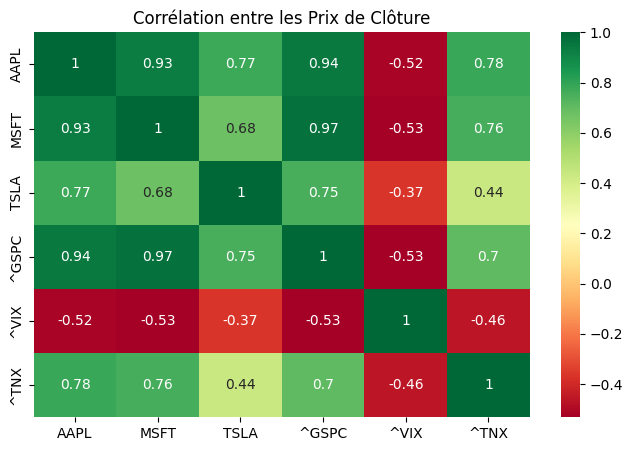

In [7]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(close_prices.corr(), annot=True, cmap='RdYlGn')
plt.title("Corrélation entre les Prix de Clôture")
plt.show()

<div style="border-left: 4px solid #2c3e50; padding-left: 15px; margin: 20px 0; font-family: sans-serif; max-width: 95%; text-align: justify;">
    <h4 style="color: #2c3e50;">Analyse de la Matrice de Corrélation des Prix</h4>
    <p>La matrice de corrélation de Pearson permet d'identifier l'intensité et la direction des relations linéaires entre les différentes variables du dataset. Les coefficients varient de -1 (corrélation négative parfaite) à +1 (corrélation positive parfaite).</p>
    
<p><b>Observations majeures basées sur la Heatmap :</b></p>
    <ul>
        <li><b>Forte Symbiose Technologique :</b> On observe une corrélation extrêmement élevée entre <b>AAPL</b> et <b>MSFT (0.93)</b>, ainsi qu'entre ces deux actifs et l'indice <b>^GSPC (0.94 et 0.97)</b>. Cela indique que les géants technologiques dictent largement la tendance du marché global (S&P 500).</li>
        <li><b>Comportement de Tesla :</b> Bien que positivement corrélée au marché, <b>TSLA</b> affiche des coefficients plus modérés (ex: 0.68 avec MSFT). Cela confirme que Tesla possède une dynamique propre, souvent déconnectée des fondamentaux du secteur technologique classique.</li>
        <li><b>Rôle Inverse du VIX :</b> Conformément à la théorie financière, le <b>^VIX</b> présente une corrélation négative avec tous les actifs (environ -0.53 avec le S&P 500). Lorsque l'incertitude et la peur augmentent sur le marché, les prix des actifs ont tendance à chuter.</li>
        <li><b>Impact des Taux (TNX) :</b> La corrélation positive entre le <b>^TNX</b> et les actions (0.70 à 0.78) suggère que, sur cette période spécifique, la hausse des taux a coïncidé avec une phase de croissance économique globale, malgré la pression théorique inverse que les taux exercent sur les valeurs de croissance.</li>
    </ul>
    <p style="border-top: 1px solid #eee; padding-top: 10px; font-weight: bold;">
        Implication pour le Data Mining : La très forte corrélation entre certaines variables (multicolinéarité) suggère que le modèle pourrait bénéficier d'une réduction de dimension ou d'une sélection rigoureuse des caractéristiques pour éviter la redondance d'information.
    </p>
</div>

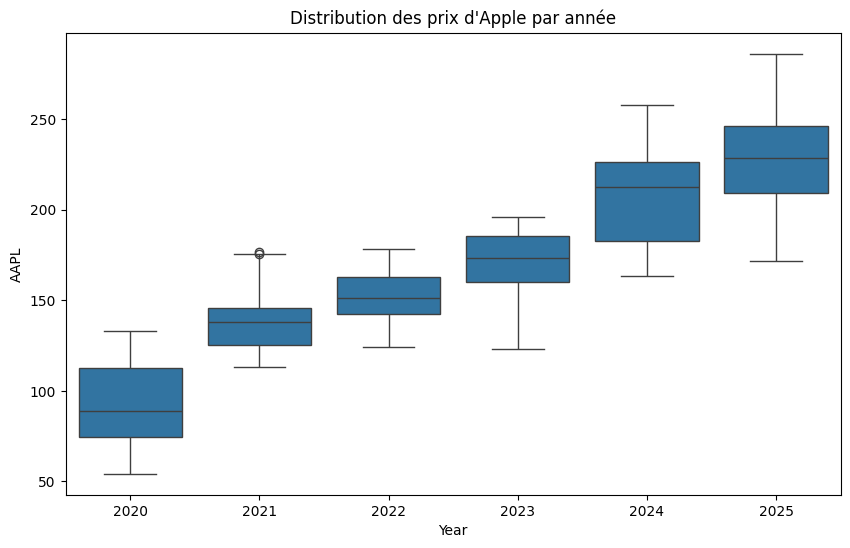

In [8]:
# Boxplot pour voir la distribution des prix par année
close_prices['Year'] = close_prices.index.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='AAPL', data=close_prices)
plt.title("Distribution des prix d'Apple par année")
plt.show()
# On retire la colonne Year pour ne pas polluer le dataframe
close_prices.drop(columns=['Year'], inplace=True)

<div style="border-left: 4px solid #2c3e50; padding-left: 15px; margin: 20px 0; font-family: sans-serif; max-width: 95%; text-align: justify;">
    <h4 style="color: #2c3e50;">Analyse de la Distribution Annuelle et de la Stationnarité (AAPL)</h4>
    <p>Le diagramme en boîtes (Boxplot) permet de visualiser l'évolution de la distribution des prix d'Apple sur une base annuelle. Chaque boîte représente l'écart interquartile (50% des données), tandis que la ligne centrale indique la médiane.</p>
    
<p><b>Observations clés :</b></p>
    <ul>
        <li><b>Tendance Structurelle :</b> On observe une progression constante et significative de la valeur médiane d'Apple entre 2020 et 2025. Cette tendance haussière confirme la croissance à long terme de l'actif sur la période étudiée.</li>
        <li><b>Évolution de la Volatilité :</b> L'étalement des boîtes et des moustaches varie selon les années. On note une augmentation de la dispersion en 2024 et 2025, suggérant une incertitude accrue sur les marchés malgré des prix plus élevés.</li>
        <li><b>Présence d'Anomalies :</b> L'année 2021 présente un point isolé (outlier) au-dessus de la moustache supérieure, indiquant un pic de prix exceptionnel et temporaire par rapport à la distribution normale de cette année-là.</li>
        <li><b>Preuve de Non-Stationnarité :</b> Le fait que la moyenne et la variance (l'étalement) changent de manière flagrante d'une année à l'autre est la preuve visuelle que les prix bruts ne sont pas stationnaires.</li>
    </ul>
    <p style="border-top: 1px solid #eee; padding-top: 10px; font-weight: bold;">
        Conclusion pour le Data Mining : Cette non-stationnarité rend les prix bruts inexploitables pour une prédiction directe par des modèles de séries temporelles. Cela justifie mathématiquement le passage aux rendements logarithmiques (log-returns) dans l'étape suivante afin de stabiliser la moyenne et la variance.
    </p>
</div>

<div style="padding: 20px; border: 1px solid #dcdde1; border-radius: 10px; background-color: #f8f9fa; margin-top: 30px; font-family: sans-serif;">
    <h4 style="color: #2f3640; margin-top: 0;"> Note Méthodologique : Pourquoi cette analyse ici ?</h4>
    <p style="color: #353b48; line-height: 1.6;">
        Il est crucial de distinguer cette phase de préparation de la phase suivante de <i>Feature Engineering</i> :
    </p>
    <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
        <tr style="background-color: #ffffff;">
            <td style="padding: 10px; border: 1px solid #dcdde1; width: 50%;">
                <b style="color: #2980b9;">Notebook 1 (Cette étape) :</b><br>
                Analyse des <b>prix réels ($)</b>. Nous nous concentrons sur l'intégrité des données, la structure du marché et le profil de risque relatif (volatilité brute).
            </td>
            <td style="padding: 10px; border: 1px solid #dcdde1; width: 50%;">
                <b style="color: #27ae60;">Notebook 2 (À suivre) :</b><br>
                Analyse des <b>rendements (%)</b>. Nous transformerons ces données en signaux mathématiques stationnaires (RSI, MACD, Lags) pour l'apprentissage automatique.
            </td>
        </tr>
    </table>
    <p style="font-style: italic; color: #7f8c8d; margin-top: 15px; font-size: 0.9em;">
        Cette séparation garantit une compréhension profonde de la nature des actifs avant de les "bruiter" avec des transformations mathématiques.
    </p>
</div>